In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("House.csv")

# DATA ANALYSING

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.shape

(545, 13)

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [8]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

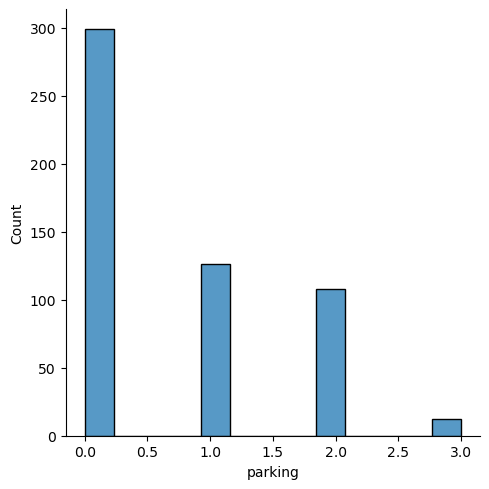

In [20]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='parking')

In [22]:
df['stories'].value_counts()

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

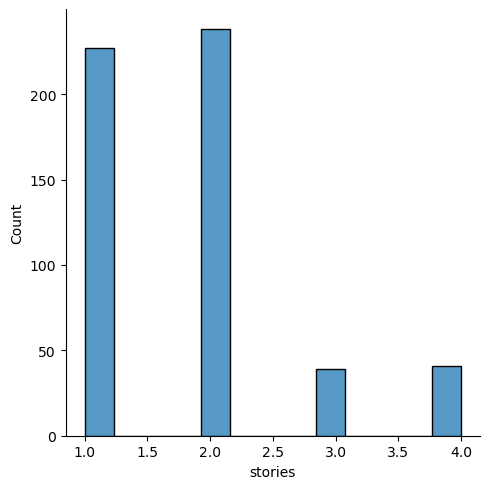

In [23]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x="stories")

In [24]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x100 with 0 Axes>

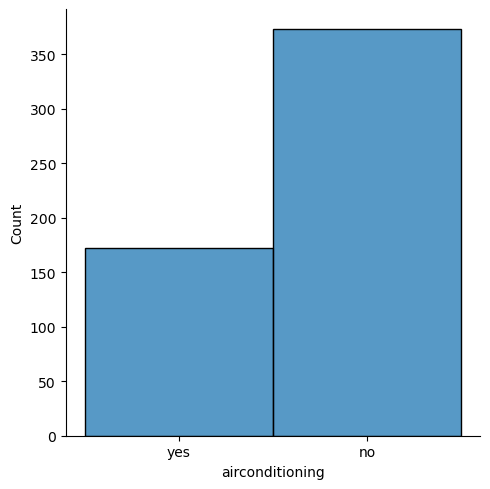

In [26]:
plt.figure(figsize=(3,1))
sns.displot(data=df,x="airconditioning")

In [29]:
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == "yes" else 0)

In [30]:
df['airconditioning']

0      1
1      1
2      0
3      1
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: airconditioning, Length: 545, dtype: int64

# Converting obj to numeric value

In [41]:
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == "yes" else 0)

In [32]:
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == "yes" else 0)

In [33]:
df['basement'] = df['basement'].apply(lambda x: 1 if x == "yes" else 0)

In [34]:
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == "yes" else 0)

In [35]:
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == "yes" else 0)

In [38]:
df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 2 if x == "furnished"  else 1 if x=="semifurnished" else 0)

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [59]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
lg= LinearRegression()

In [48]:
x=df.drop("price",axis=1)

In [49]:
y=df["price"]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [62]:
x.shape

(545, 12)

In [63]:
train=lg.fit(x_train,y_train)

In [66]:
y_pred = lg.predict(x_test)

In [74]:
train.predict([[7420,4,2,3,1,0,0,0,1,2,1,2]])[0]

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8212802.628803565

In [67]:
y_pred

array([ 3052563.28769148,  4743531.64359866,  2718752.62922358,
        2935469.8753203 ,  6290924.58915473,  3938813.62609252,
        3795383.07356482,  3147218.35851905,  3764006.11712673,
        3760915.37090995,  3864017.27586839,  3535110.22975266,
        3822885.90899521,  5271289.18474987,  4999860.48510697,
        6883444.01573599,  7276468.85558139,  4551279.0825125 ,
        2934006.45161778,  4314414.37245803,  5296098.46423824,
        4885732.44235251,  4656569.73800791,  6354150.74168231,
        2442900.7085261 ,  2784011.54800249,  2748501.36576939,
        4157173.96161516,  5253761.05939045,  3154456.82915878,
        4775477.97321549,  3902846.1859294 ,  3759643.30197714,
        4790709.26354062,  3997938.05913681,  7400213.82991394,
        2510386.66374803,  5390884.35493909,  4945960.62677642,
        3125915.06718673,  7158424.23129975,  3431183.57100175,
        3336586.43387182,  4385276.27186398,  3509974.85674973,
        3619281.78443043,  3107564.01659

In [70]:
r2_score(y_test,y_pred)

0.6817400400810385

In [72]:
lg.predict([[7420,4,2,3,1,0,0,0,1,2,1,2]])[0]

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8212802.628803565

In [83]:
import pickle
with open("test.pkl", "wb") as f:
    pickle.dump(train, f)